In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('D:\PycharmProjects\Sign-CNN\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\PycharmProjects\Sign-CNN\data\american_sign_language.PNG
D:\PycharmProjects\Sign-CNN\data\amer_sign2.png
D:\PycharmProjects\Sign-CNN\data\amer_sign3.png
D:\PycharmProjects\Sign-CNN\data\sign_mnist_test.csv
D:\PycharmProjects\Sign-CNN\data\sign_mnist_train.csv
D:\PycharmProjects\Sign-CNN\data\sign_mnist_test\sign_mnist_test.csv
D:\PycharmProjects\Sign-CNN\data\sign_mnist_train\sign_mnist_train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
import sklearn
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
train_df = pd.read_csv("D:\PycharmProjects\Sign-CNN\data\sign_mnist_train\sign_mnist_train.csv")
test_df = pd.read_csv("D:\PycharmProjects\Sign-CNN\data\sign_mnist_train\sign_mnist_train.csv")

In [4]:
test = pd.read_csv("D:\PycharmProjects\Sign-CNN\data\sign_mnist_train\sign_mnist_train.csv")
y = test['label']

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


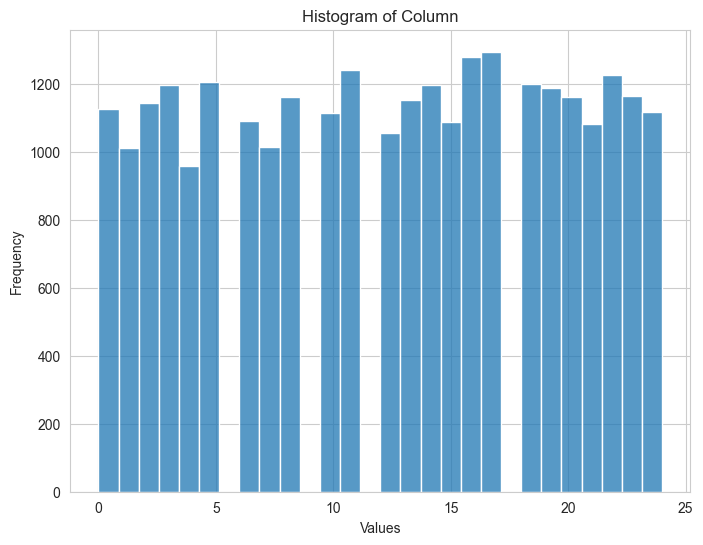

In [7]:

# Example: Plot a histogram of a numerical column
plt.figure(figsize=(8, 6))
sns.histplot(train_df['label'])
plt.title('Histogram of Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [8]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [9]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [10]:
x_train = train_df.values
x_test = test_df.values

In [11]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [12]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

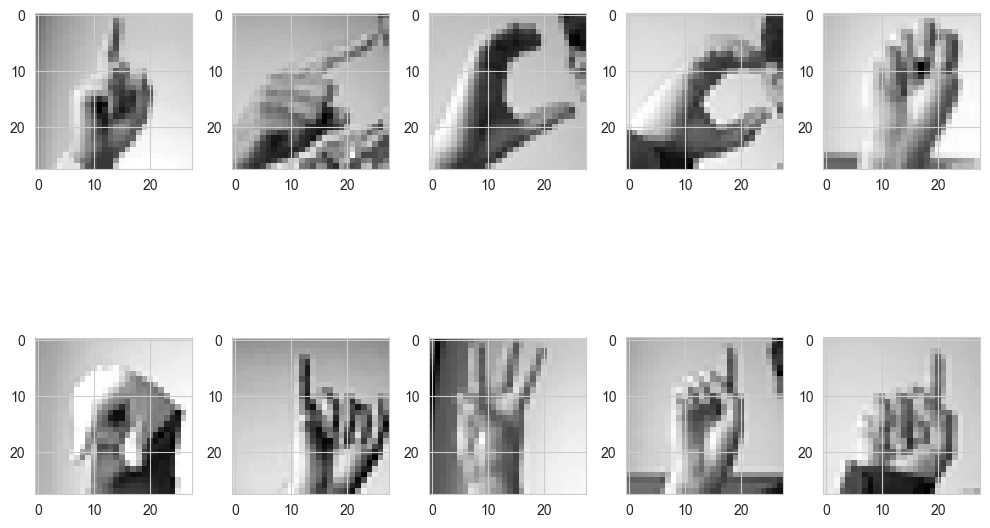

In [13]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [16]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

D:\envs\Sign-CNN\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 75)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 25)       │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,049 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

In [17]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20


D:\envs\Sign-CNN\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 84s 358ms/step - accuracy: 0.4756 - loss: 1.7734 - val_accuracy: 0.0458 - val_loss: 3.6916 - learning_rate: 0.0010
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 75s 344ms/step - accuracy: 0.9173 - loss: 0.2541 - val_accuracy: 0.6638 - val_loss: 1.2064 - learning_rate: 0.0010
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 76s 350ms/step - accuracy: 0.9631 - loss: 0.1148 - val_accuracy: 0.9969 - val_loss: 0.0248 - learning_rate: 0.0010
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 76s 350ms/step - accuracy: 0.9786 - loss: 0.0655 - val_accuracy: 0.9933 - val_loss: 0.0221 - learning_rate: 0.0010
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 74s 343ms/step - accuracy: 0.9859 - loss: 0.0436 - val_accuracy: 0.9973 - val_loss: 0.0128 - learning_rate: 0.0010
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 77s 355ms/step - accuracy: 0.9871 - loss: 0.0410 - val_accuracy: 1.0000 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 76s 351ms/step - accuracy: 0.9914 - loss:

In [18]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")



858/858 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 1.0000 - loss: 6.3785e-05
Accuracy of the model is -  100.0 %


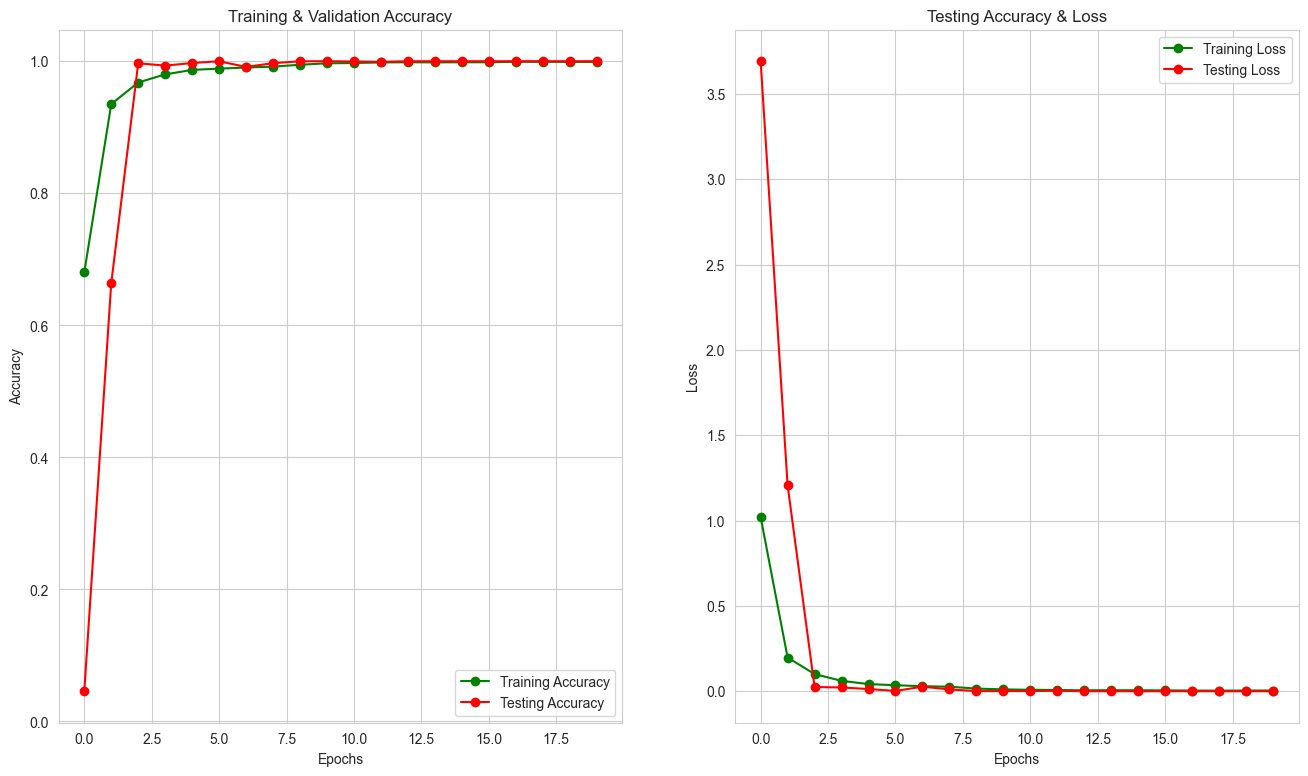

In [19]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [20]:
predict_x = model.predict(x_test) 
classes_x = np.argmax(predict_x,axis=1)
for i in range(len(classes_x)):
    if(classes_x[i] >= 9):
        classes_x[i] += 1
classes_x[:5]   

858/858 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step


array([ 3,  6,  2,  2, 13], dtype=int64)

In [21]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, classes_x, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      1126
     Class 1       1.00      1.00      1.00      1010
     Class 2       1.00      1.00      1.00      1144
     Class 3       1.00      1.00      1.00      1196
     Class 4       1.00      1.00      1.00       957
     Class 5       1.00      1.00      1.00      1204
     Class 6       1.00      1.00      1.00      1090
     Class 7       1.00      1.00      1.00      1013
     Class 8       1.00      1.00      1.00      1162
    Class 10       1.00      1.00      1.00      1114
    Class 11       1.00      1.00      1.00      1241
    Class 12       1.00      1.00      1.00      1055
    Class 13       1.00      1.00      1.00      1151
    Class 14       1.00      1.00      1.00      1196
    Class 15       1.00      1.00      1.00      1088
    Class 16       1.00      1.00      1.00      1279
    Class 17       1.00      1.00      1.00      1294
    Class 18       1.00    

In [22]:
cm = confusion_matrix(y,classes_x)

In [23]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

<Axes: >

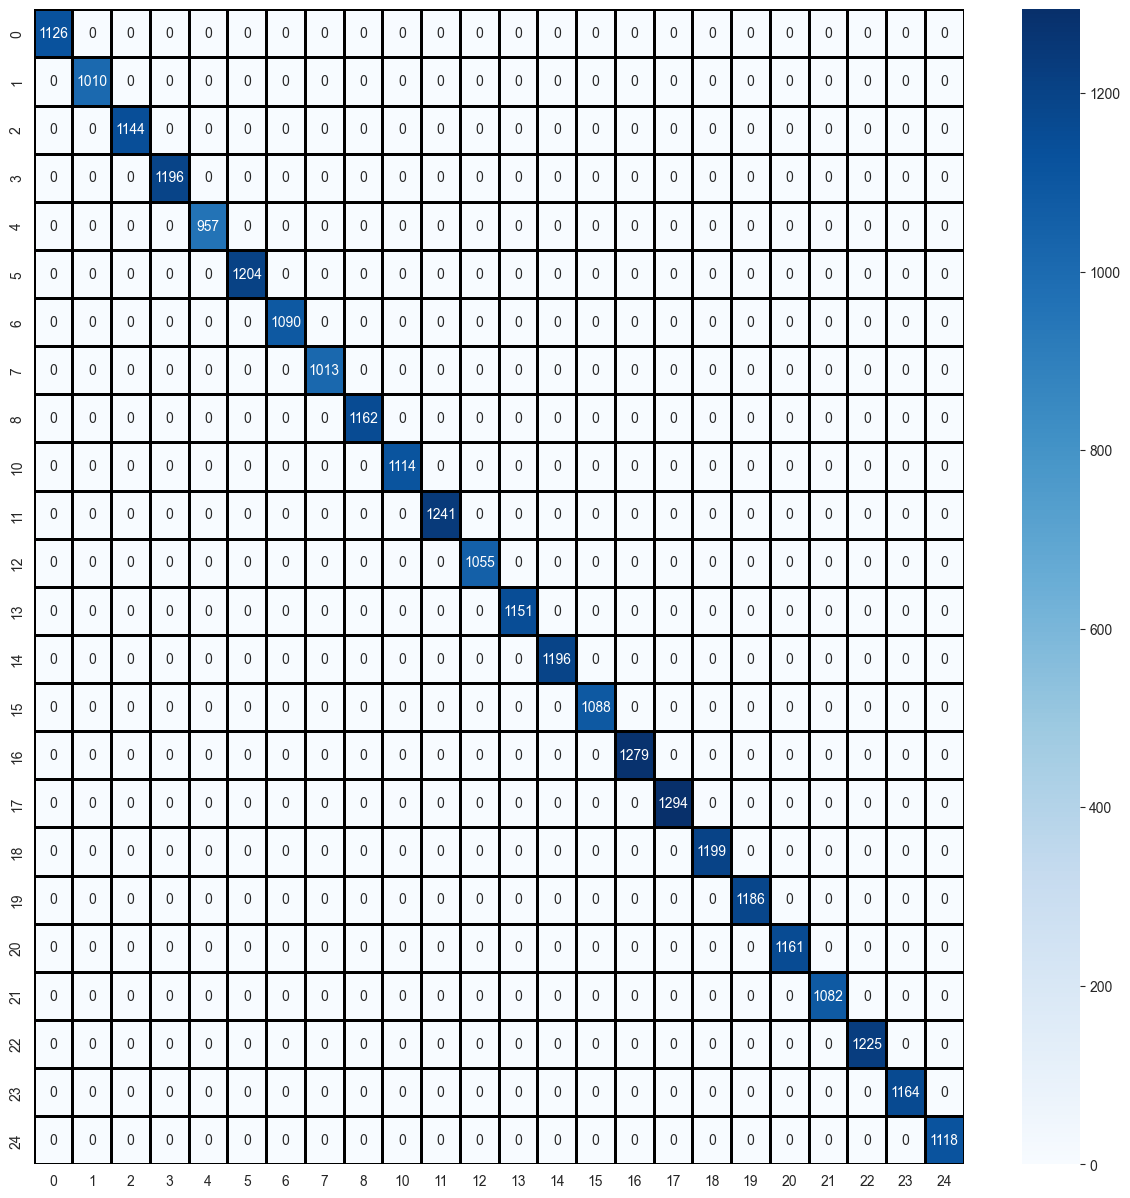

In [24]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [25]:
correct = np.nonzero(classes_x == y)[0]

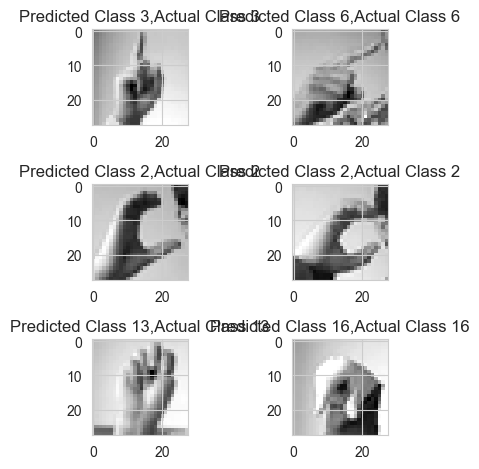

In [26]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(classes_x[c], y[c]))
    plt.tight_layout()
    i += 1

In [27]:
def getLetter(result):
    classLabels = {
        0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 10: 'K', 11: 'L', 12: 'M',
        13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'
    }
    try:
        res = int (result)
        return classLabels[res]
    except:
        return 'Not Found'

In [30]:
import cv2
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read() 
    roi = frame[100:400, 320:620]
    cv2.imshow("ROI", roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    cv2.imshow("ROI scaled and grey", roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (0, 255, 0), 5)
    roi = roi.reshape(1, 28, 28, 1)
    result = model.predict(roi, verbose=0)
    predicted_class = np.argmax(result[0])
    predicted_class = str(predicted_class)
    
    cv2.putText(copy, getLetter(predicted_class), (300, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2)
    cv2.imshow("Frame", copy)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()